In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)

In [14]:

def generate_credit_data(n=10000):
    income = np.random.normal(70000, 20000, n).astype(int)
    debt = np.random.normal(20000, 10000, n).clip(0).astype(int)
    credit_history_years = np.random.randint(1, 30, n)
    credit_mix = np.random.randint(1, 6, n)
    new_credit_apps = np.random.randint(0, 8, n)
    on_time = np.random.randint(0, 60, n)
    late = np.random.binomial(n=on_time, p=0.1)
    payment_ratio = on_time / (on_time + late + 1e-5)


    score = (income / 1000) - (debt / 1000) + (credit_history_years * 1.5) + (payment_ratio * 20) - (new_credit_apps * 2)
    prob = 1 / (1 + np.exp(-0.1 * (score - 50)))
    creditworthiness = np.where(prob > 0.5, 1, 0)  

    df = pd.DataFrame({
        'Income': income,
        'Debt': debt,
        'Credit_History_Years': credit_history_years,
        'Credit_Mix': credit_mix,
        'New_Credit_Apps': new_credit_apps,
        'On_Time_Payments': on_time,
        'Late_Payments': late,
        'Payment_Ratio': payment_ratio,
        'Creditworthiness': creditworthiness
    })
    return df

df = generate_credit_data()


In [15]:
df.head()

,Income,Debt,Credit_History_Years,Credit_Mix,New_Credit_Apps,On_Time_Payments,Late_Payments,Payment_Ratio,Creditworthiness
0,54657,24986,11,5,3,59,10,0.855072,1
1,107414,28368,16,4,2,53,5,0.913793,1
2,86272,31330,19,4,0,22,3,0.880000,1
3,69129,16406,28,5,7,38,6,0.863636,1
4,85766,19916,24,2,0,4,0,0.999998,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                10000 non-null  int32  
 1   Debt                  10000 non-null  int32  
 2   Credit_History_Years  10000 non-null  int32  
 3   Credit_Mix            10000 non-null  int32  
 4   New_Credit_Apps       10000 non-null  int32  
 5   On_Time_Payments      10000 non-null  int32  
 6   Late_Payments         10000 non-null  int32  
 7   Payment_Ratio         10000 non-null  float64
 8   Creditworthiness      10000 non-null  int32  
dtypes: float64(1), int32(8)
memory usage: 390.8 KB


In [17]:
df.describe()

,Income,Debt,Credit_History_Years,Credit_Mix,New_Credit_Apps,On_Time_Payments,Late_Payments,Payment_Ratio,Creditworthiness
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69668.132200,19982.684400,15.018200,3.004500,3.488600,29.163100,2.918100,0.897346,0.896000
std,20019.120118,9827.751374,8.386555,1.419888,2.296606,17.301666,2.374438,0.134949,0.305276
min,-2087.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56242.750000,13189.000000,8.000000,2.000000,1.000000,14.000000,1.000000,0.877193,1.000000
50%,69721.500000,19707.000000,15.000000,3.000000,4.000000,29.000000,3.000000,0.914285,1.000000
75%,83257.500000,26651.500000,22.000000,4.000000,5.000000,44.000000,4.000000,0.950000,1.000000
max,143180.000000,58600.000000,29.000000,5.000000,7.000000,59.000000,15.000000,1.000000,1.000000


In [18]:
df.isnull().sum()

Income                  0
Debt                    0
Credit_History_Years    0
Credit_Mix              0
New_Credit_Apps         0
On_Time_Payments        0
Late_Payments           0
Payment_Ratio           0
Creditworthiness        0
dtype: int64

In [19]:
df['Creditworthiness'].unique()

array([1, 0])

In [7]:

X = df.drop('Creditworthiness', axis=1)
y = df['Creditworthiness']


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [11]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.974
0.975382932166302
0.9960893854748604
0.9856274184632394


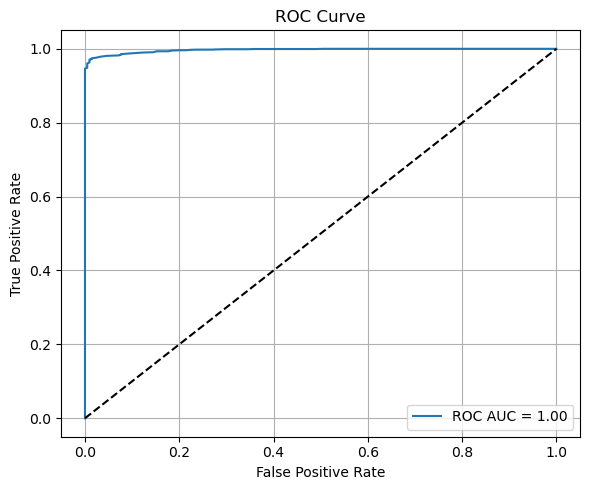

(0.974,
 0.975382932166302,
 0.9960893854748604,
 0.9856274184632394,
 0.9966759776536313,
 array([[ 165,   45],
        [   7, 1783]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.79      0.86       210\n           1       0.98      1.00      0.99      1790\n\n    accuracy                           0.97      2000\n   macro avg       0.97      0.89      0.92      2000\nweighted avg       0.97      0.97      0.97      2000\n')

In [12]:

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(accuracy, precision, recall, f1, roc_auc, conf_matrix, report)
